In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [4]:
#baseline model first then further feature engineering

In [2]:
df = pd.read_csv('../data/cleaned_heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


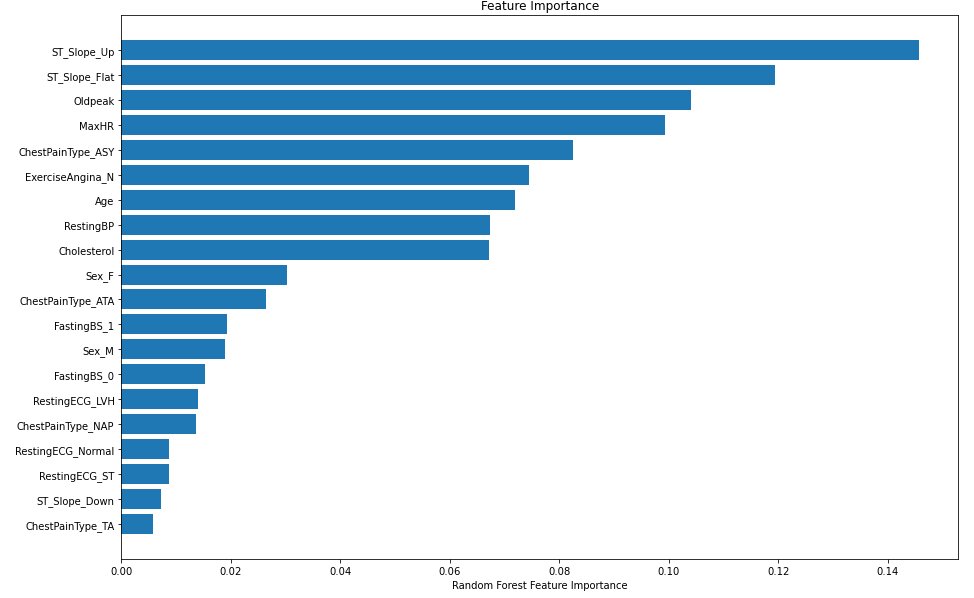

In [17]:
from IPython.display import display, Image
display(Image(filename='../figures/feature_importance.png'))

In [20]:
#using image above, reduce extra features that can be considered "noise"
#do it iteritivly, remove a feature, test model, repeat and see if theres improvements
#or just remove all that i think should be removed and see what happens?
#chestpain type can be converted into just asymptomatic or not

In [21]:
df = pd.read_csv('../data/cleaned_heart.csv')

In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [6]:
CPT = df['ChestPainType']

In [7]:
adjusted_CPT = []
for ele in CPT:
    if ele == 'ASY':
        pass
    else:
        ele = 'SYM'
    adjusted_CPT.append(ele)

In [41]:
df['ChestPainType'] = adjusted_CPT

In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,SYM,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,SYM,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,SYM,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,SYM,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [44]:
#remove restingECG, Sex, and fasting BS

In [45]:
df = df.drop(['RestingECG','Sex','FastingBS'], axis=1)

In [47]:
df.to_csv('../data/features_removed_heart.csv', index=False)

In [48]:
#add back sex to df

In [49]:
df = pd.read_csv('../data/cleaned_heart.csv')

In [50]:
df['ChestPainType'] = adjusted_CPT

In [51]:
df = df.drop(['RestingECG','FastingBS'], axis=1)

In [52]:
df.to_csv('../data/somefeatures_removed_heart.csv', index=False)

In [53]:
#try sequential forward selection?

##### Through SFS, found that I should use chest pain type, st slope, sex, fasting blood sugar, exercise angina, and oldpeak

In [3]:
df = pd.read_csv('../data/cleaned_heart.csv')

In [8]:
df['ChestPainType'] = adjusted_CPT

In [10]:
columns_to_keep = ['Sex','ChestPainType','FastingBS','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']

In [11]:
df = df[columns_to_keep]

In [12]:
df

,Sex,ChestPainType,FastingBS,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,SYM,0,N,0.0,Up,0
1,F,SYM,0,N,1.0,Flat,1
2,M,SYM,0,N,0.0,Up,0
3,F,ASY,0,Y,1.5,Flat,1
4,M,SYM,0,N,0.0,Up,0
...,...,...,...,...,...,...,...
913,M,SYM,0,N,1.2,Flat,1
914,M,ASY,1,N,3.4,Flat,1
915,M,ASY,0,Y,1.2,Flat,1
916,F,SYM,0,N,0.0,Flat,1


In [13]:
df.to_csv('../data/sfs_features.csv', index=False)

In [17]:
asy=df[df['ChestPainType']=='ASY']

In [18]:
sym=df[df['ChestPainType']=='SYM']

In [19]:
asy[asy['HeartDisease']==1]

,Sex,ChestPainType,FastingBS,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,F,ASY,0,Y,1.5,Flat,1
8,M,ASY,0,Y,1.5,Flat,1
13,M,ASY,0,Y,1.0,Flat,1
16,M,ASY,0,N,0.0,Flat,1
18,M,ASY,0,N,1.0,Flat,1
...,...,...,...,...,...,...,...
909,F,ASY,0,Y,0.0,Flat,1
911,M,ASY,1,N,1.0,Flat,1
912,F,ASY,0,Y,0.2,Flat,1
914,M,ASY,1,N,3.4,Flat,1
